# Simple bayes classifer

In [450]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict
import math

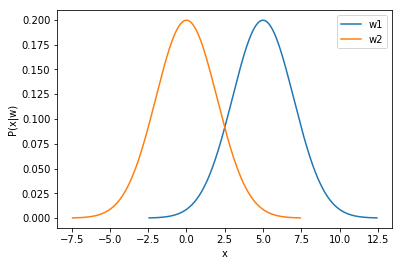

In [2]:
### Plot Likelihood
w1_llh = norm(5,2)
w2_llh = norm(0,2)

w1_x = np.linspace(w1_llh.ppf(0.0001),w1_llh.ppf(0.9999), 10000)
w2_x = np.linspace(w2_llh.ppf(0.0001),w2_llh.ppf(0.9999), 10000)

plt.plot(w1_x,w1_llh.pdf(w1_x))
plt.plot(w2_x,w2_llh.pdf(w2_x))
plt.legend(["w1","w2"])
plt.ylabel("P(x|w)")
plt.xlabel('x')
plt.show()

### T2

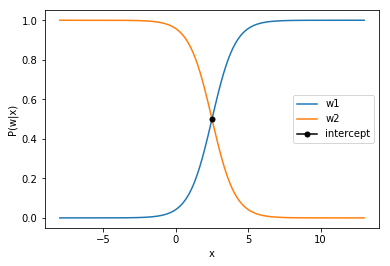

Decision boundary: x = 2.500262506562665


In [5]:
### Plot Posteriors
x = np.linspace(-8,13,40000)
llh_ratio = w1_llh.pdf(x) / w2_llh.pdf(x)
w1_post = llh_ratio / (llh_ratio+1)
w2_post = 1 / (llh_ratio+1)

intercept = 0
for i in range(40000):
    if(w1_post[i] > w2_post[i]):
        intercept = i
        break

plt.plot(x, w1_post)
plt.plot(x, w2_post)
plt.plot(x[i],w1_post[i],marker='o', markersize=5, color = "black")
plt.legend(["w1","w2","intercept"])
plt.ylabel("P(w|x)")
plt.xlabel('x')
plt.show()

print("Decision boundary: x =",x[i])

### T3

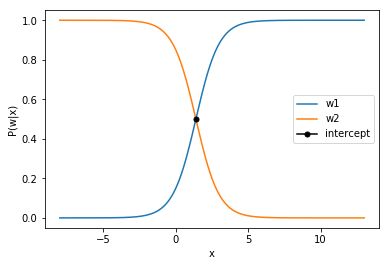

Decision boundary: x = 1.391434785869647


In [11]:
### Plot Posteriors 
### Happy prior = 0.8

x = np.linspace(-8,13,40000)
llh_ratio = w1_llh.pdf(x) / w2_llh.pdf(x) * 0.8 / 0.2
w1_post = llh_ratio / (llh_ratio+1)
w2_post = 1 / (llh_ratio+1)

intercept = 0
for i in range(40000):
    if(w1_post[i] > w2_post[i]):
        intercept = i
        break

plt.plot(x, w1_post)
plt.plot(x, w2_post)
plt.plot(x[i],w1_post[i],marker='o', markersize=5, color = "black")
plt.legend(["w1","w2","intercept"])
plt.ylabel("P(w|x)")
plt.xlabel('x')
plt.show()

print("Decision boundary: x =",x[intercept])

# Employee

In [3]:
pd.set_option('display.max_columns', 40)

In [4]:
data = pd.read_csv("hr-employee-attrition-with-null.csv")
data.head()

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41.0,Yes,Travel_Rarely,NaN,NaN,1.0,NaN,Life Sciences,1.0,1.0,2.0,Female,94.0,3.0,2.0,NaN,4.0,Single,NaN,19479.0,8.0,Y,Yes,11.0,NaN,1.0,80.0,0.0,8.0,0.0,NaN,6.0,NaN,0.0,NaN
1,1,NaN,No,NaN,279.0,Research & Development,NaN,NaN,Life Sciences,1.0,2.0,3.0,Male,61.0,2.0,2.0,Research Scientist,2.0,Married,NaN,24907.0,1.0,Y,NaN,23.0,NaN,4.0,NaN,1.0,10.0,NaN,3.0,10.0,NaN,NaN,7.0
2,2,37.0,Yes,NaN,1373.0,NaN,2.0,2.0,NaN,1.0,4.0,NaN,Male,92.0,2.0,1.0,Laboratory Technician,3.0,Single,NaN,2396.0,6.0,Y,Yes,15.0,3.0,NaN,80.0,0.0,7.0,3.0,NaN,NaN,0.0,NaN,0.0
3,3,NaN,No,Travel_Frequently,1392.0,Research & Development,3.0,4.0,Life Sciences,NaN,NaN,NaN,Female,56.0,3.0,1.0,Research Scientist,3.0,NaN,2909.0,23159.0,1.0,Y,Yes,11.0,3.0,3.0,NaN,NaN,8.0,3.0,NaN,8.0,NaN,3.0,0.0
4,4,27.0,No,Travel_Rarely,591.0,Research & Development,2.0,1.0,Medical,1.0,7.0,1.0,Male,40.0,NaN,1.0,NaN,2.0,NaN,3468.0,16632.0,NaN,Y,No,NaN,3.0,4.0,80.0,1.0,6.0,NaN,3.0,2.0,2.0,2.0,NaN


In [5]:
data.shape

(1470, 36)

In [ ]:
for k in data.keys():
    print(k, type(data[k][0]))

## Data cleaning

In [7]:
data.loc[data["Attrition"] == "Yes", "Attrition"] = 1.0
data.loc[data["Attrition"] == "No", "Attrition"] = 0.0
cat_cols = ["BusinessTravel", "Department", "EducationField", "Gender", "MaritalStatus", "Over18", "OverTime", "JobRole"]
for col in cat_cols:
    data[col] = pd.Categorical(data[col]).codes
data = data.drop(columns = ["Unnamed: 0", "EmployeeNumber"])

In [8]:
test_split = 0.1

yes_data = data[data["Attrition"] == 1]
no_data = data[data["Attrition"] == 0]

test_set = yes_data.loc[:int(len(yes_data)*test_split)] 
test_set = test_set.append(no_data.loc[:int(len(no_data)*test_split)])
train_set = yes_data.loc[int(len(yes_data)*test_split):]
train_set = train_set.append(no_data.loc[int(len(no_data)*test_split):])
# test_set = test_set.reset_index()
# train_set = test_set.reset_index()
print ("train", test_set.shape, "\ntest", train_set.shape)

train (108, 34) 
test (1363, 34)


## Histrogram Discretization

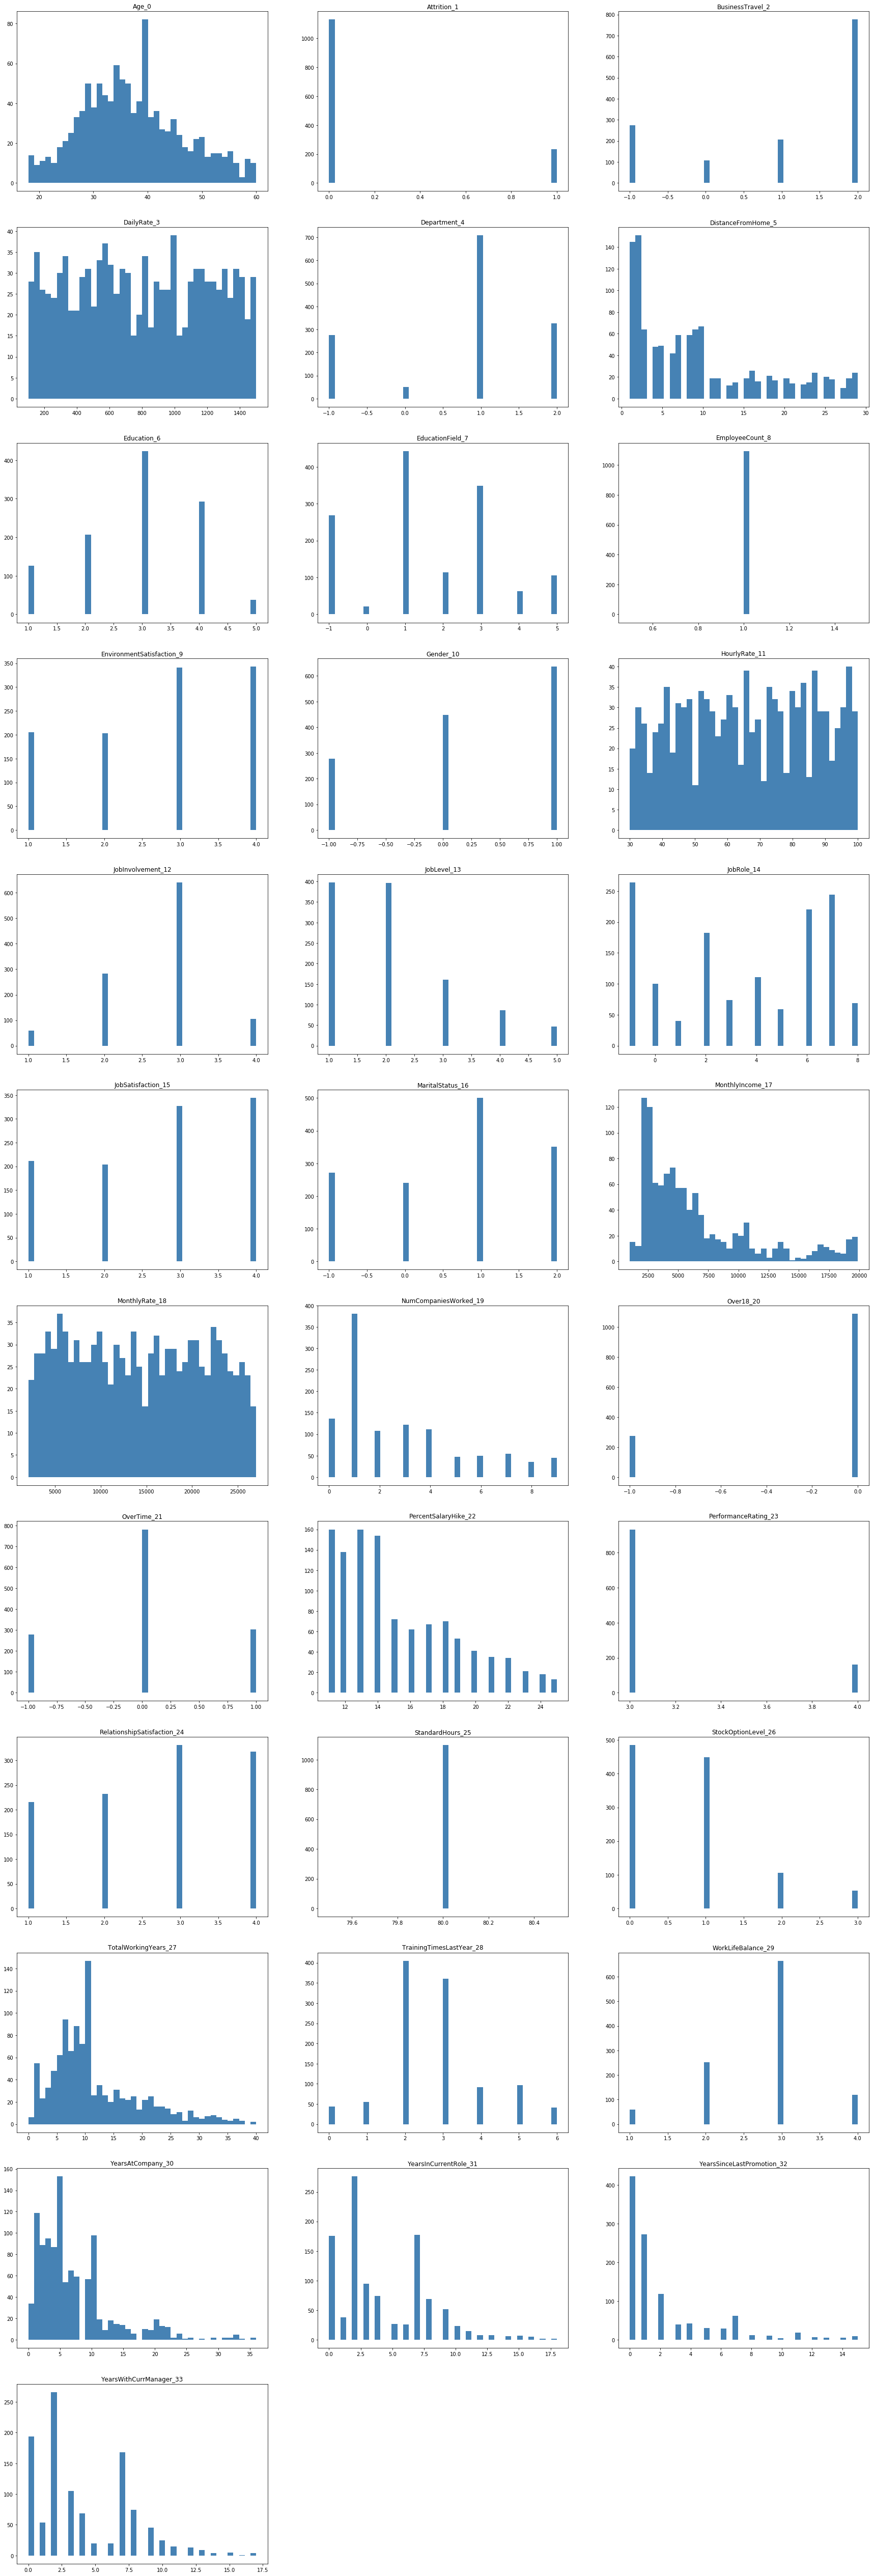

In [415]:
plt.figure(figsize=(30,100))
for i,k in enumerate(train_set.keys()):
    train_no_nan = train_set[~np.isnan(train_set[k])][k]
    hist, bin_edge = np.histogram(train_no_nan, 40)
    plt.subplot(13,3,i+1)
    plt.title(k + "_" + str(i))
    plt.fill_between(bin_edge.repeat(2)[1:-1], 
                    hist.repeat(2), facecolor='steelblue')

plt.show()

### T4
We cannot use Guassian to estimate these feature because there are no such feature with guassian-like histogram shape.

We can use GMM bacause it can fit any distribution.

### T5
This isn't a good discritization because the results have many of zero bin.

In [416]:
print("### zero bin count ###")
for i,k in enumerate(train_set.keys()):
    train_no_nan = train_set[~np.isnan(train_set[k])][k]
    hist, bin_edge = np.histogram(train_no_nan, 40)
    print(k, sum(hist == 0))

### zero bin count ###
Age 0
Attrition 38
BusinessTravel 36
DailyRate 0
Department 36
DistanceFromHome 11
Education 35
EducationField 33
EmployeeCount 39
EnvironmentSatisfaction 36
Gender 37
HourlyRate 0
JobInvolvement 36
JobLevel 35
JobRole 30
JobSatisfaction 36
MaritalStatus 36
MonthlyIncome 0
MonthlyRate 0
NumCompaniesWorked 30
Over18 38
OverTime 37
PercentSalaryHike 25
PerformanceRating 38
RelationshipSatisfaction 36
StandardHours 39
StockOptionLevel 36
TotalWorkingYears 1
TrainingTimesLastYear 33
WorkLifeBalance 36
YearsAtCompany 6
YearsInCurrentRole 21
YearsSinceLastPromotion 24
YearsWithCurrManager 22


In [417]:
def digitize(d, col, nbins, plot=False):    
    d_no_nan = d[~np.isnan(d[col])][col]
    bin_edge = np.linspace(d_no_nan.min(), d_no_nan.max(), nbins+1)
    idx = np.digitize(d_no_nan, bin_edge)
    bincount = np.bincount(idx)
    bincount[-2] += bincount[-1]
    bincount = bincount[:-1]
    if(plot == True):
        plt.title("{} with bins = {}".format(col,bins))
        plt.fill_between(bin_edge.repeat(2)[1:-1],bincount[1:].repeat(2),facecolor='steelblue')
        plt.show()
    return idx, bin_edge, bincount

### T6
binsize 40 is the most sensible choice for Age and MonthlyIncome.

binsize 10 is more suitable for DistanceFromHome.

binsize is good if its the smallest size and left no empty bin.

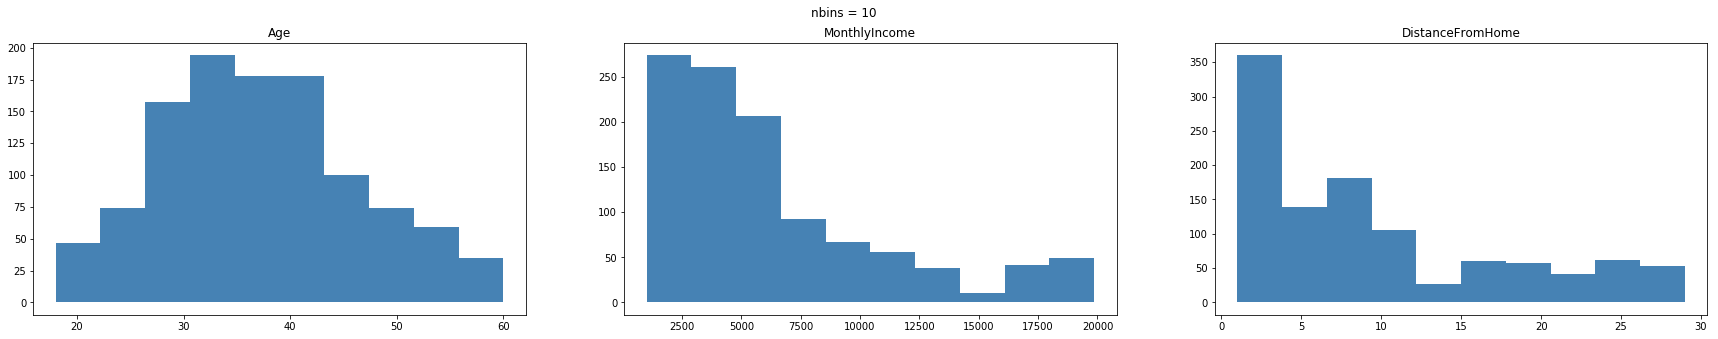

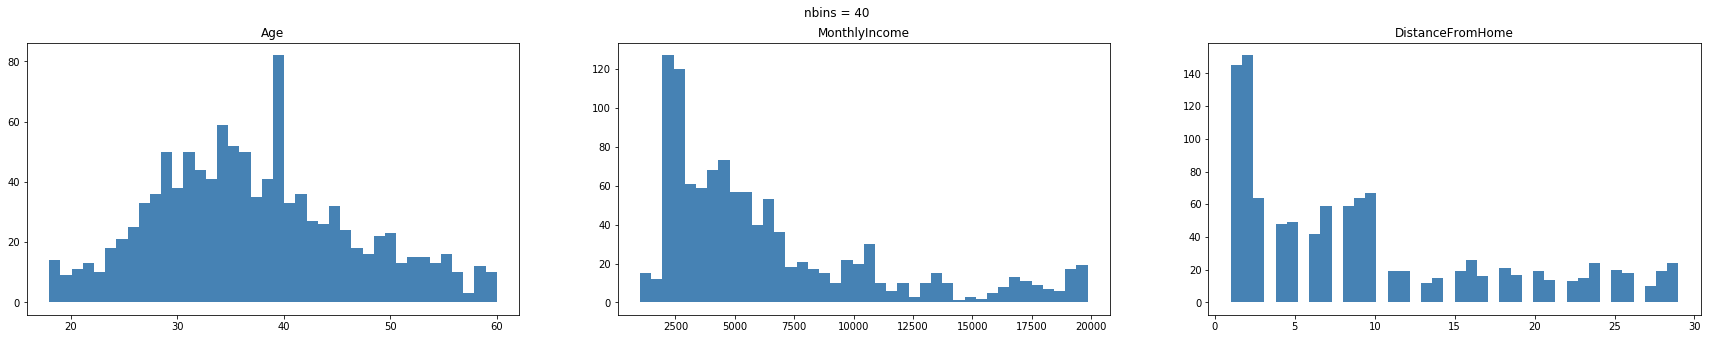

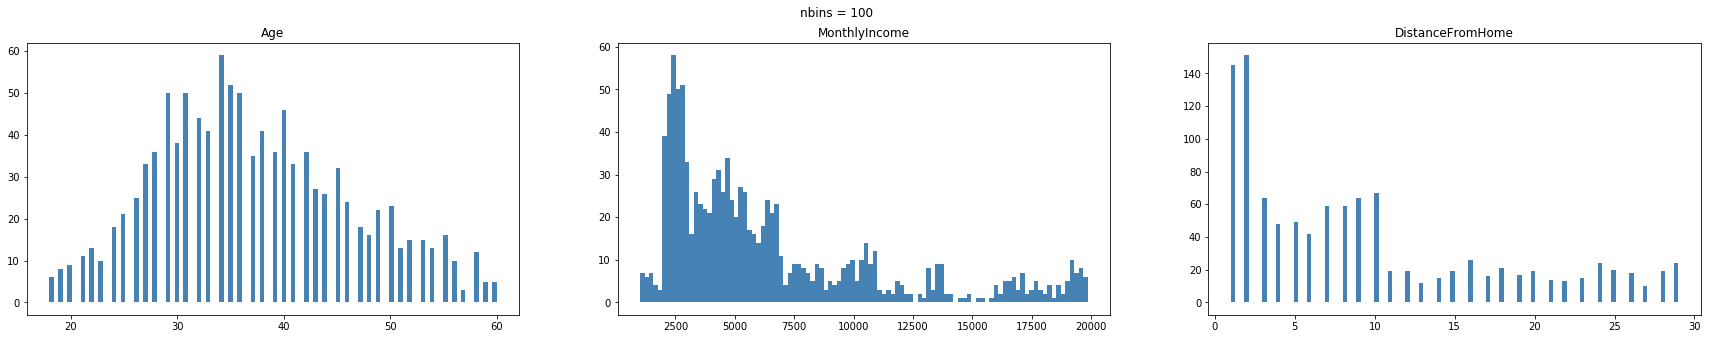

In [418]:
bins_list = [10, 40, 100]
for i, bins in enumerate(bins_list):
    plt.figure(i, figsize=(30,5))
    plt.suptitle("nbins = " + str(bins))
    idx, binedge, bincount = digitize(train_set, "Age", bins)
    plt.subplot(1,3,1)
    plt.title("Age")
    plt.fill_between(binedge.repeat(2)[1:-1],bincount[1:].repeat(2),facecolor='steelblue')
    idx, binedge, bincount = digitize(train_set, "MonthlyIncome", bins)
    plt.subplot(1,3,2)
    plt.title("MonthlyIncome")
    plt.fill_between(binedge.repeat(2)[1:-1],bincount[1:].repeat(2),facecolor='steelblue')
    idx, binedge, bincount = digitize(train_set, "DistanceFromHome", bins)
    plt.subplot(1,3,3)
    plt.title("DistanceFromHome")
    plt.fill_between(binedge.repeat(2)[1:-1],bincount[1:].repeat(2),facecolor='steelblue')
plt.show()

## MLE for discretized histrogram

### T7
Criteria: We should digitize continuous data to handle possibly missing value in training set.


In [769]:
### MLE
def cal_MLE(fixed_bins = 10):
    likelihood_leave = defaultdict(lambda : {})
    likelihood_stay = defaultdict(lambda : {})

    target_cols = ['Age',
     'DailyRate',
     'DistanceFromHome',
     'HourlyRate',
     'MonthlyIncome',
     'MonthlyRate',
     'TotalWorkingYears',
     'YearsAtCompany',
     'YearsInCurrentRole',
     'YearsSinceLastPromotion',
     'YearsWithCurrManager',
     'PercentSalaryHike']

    for k in train_set.keys():
    
        if(k in target_cols):
            # leave
            idx, binedge, bincount = digitize(train_set[train_set["Attrition"] == 1], k, fixed_bins)
            likelihood_leave[k]["binedge"] = binedge
            likelihood_leave[k]["pdf"] =  bincount/len(idx)
            likelihood_leave[k]["type"] = "range"

            idx, binedge, bincount = digitize(train_set[train_set["Attrition"] == 0], k, fixed_bins)
            likelihood_stay[k]["binedge"] = binedge
            likelihood_stay[k]["pdf"] =  bincount/len(idx)
            likelihood_stay[k]["type"] = "range"

        else:
            no_nan = train_set.loc[~np.isnan(train_set[k])]
            no_nan = no_nan.loc[no_nan[k] >= 0]               

            leave = no_nan.loc[no_nan["Attrition"] == 1]
            stay = no_nan.loc[no_nan["Attrition"] == 0]

            keys = np.unique(leave[k])
            hist = np.bincount(leave[k].tolist())        
            likelihood_leave[k]["binedge"] = keys
            likelihood_leave[k]["pdf"] =  hist/sum(hist)
            likelihood_leave[k]["type"] = "discrete"

            keys = np.unique(stay[k])
            hist = np.bincount(stay[k].tolist())        
            likelihood_stay[k]["binedge"] = keys
            likelihood_stay[k]["pdf"] =  hist/sum(hist)
            likelihood_stay[k]["type"] = "discrete"

    for k in likelihood_stay:
        assert sum(likelihood_leave[k]["pdf"]) - 1.0 < 1e-6
        assert sum(likelihood_stay[k]["pdf"]) - 1.0 < 1e-6
    
    return likelihood_leave, likelihood_stay

In [770]:
likelihood_leave, likelihood_stay = cal_MLE()

### T8
Non-Parameteric approach

Estimate MLE by divide histrogram by size of dataset

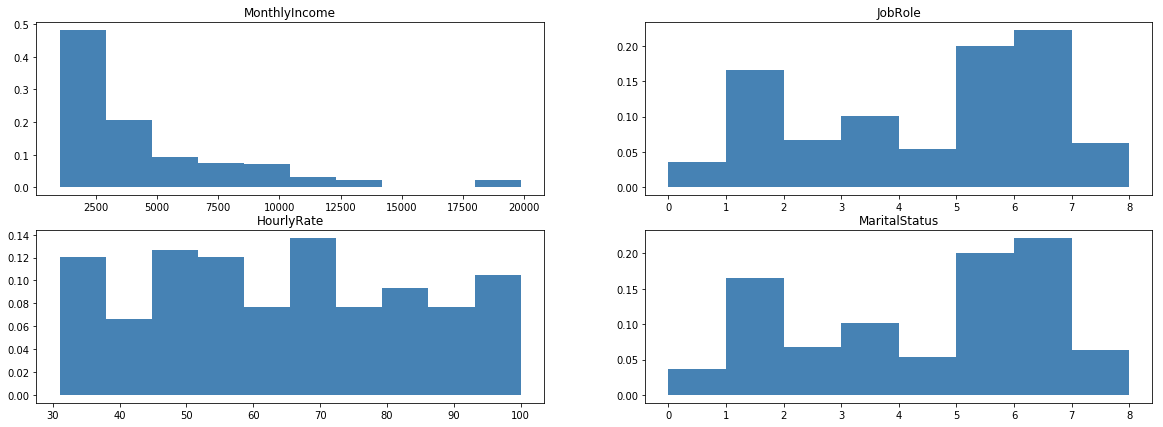

In [771]:
plt.figure(figsize=(20,7))
for i, k in enumerate(["MonthlyIncome", "JobRole", "HourlyRate", "MaritalStatus"]):
    binedge = likelihood[k]["binedge"]
    pdf = likelihood[k]["pdf"]
    plt.subplot(2,2,i+1)
    plt.title(k)
    plt.fill_between(binedge.repeat(2)[1:-1],pdf[1:].repeat(2),facecolor='steelblue')

plt.show()

### T9

In [540]:
prior_leave = len(train_set.loc[train_set["Attrition"] == 1]) / len(train_set)
prior_stay = len(train_set.loc[train_set["Attrition"] == 0]) / len(train_set)
print("leave prior = {}\nstay prior = {}".format(prior_leave, prior_stay))

leave prior = 0.17094644167278064
stay prior = 0.8290535583272194


## Naive Bayes Classifier

In [784]:
def H(x, likelihood_leave = likelihood_leave, likelihood_stay = likelihood_stay):
    llh = 0
    for k in x.keys():
        if(k != "Attrition" and not np.isnan(x[k]) and x[k] >= 0):
            llh_l_p = likelihood_leave[k]["pdf"]
            llh_l_b = likelihood_leave[k]["binedge"]
            llh_s_p = likelihood_stay[k]["pdf"]
            llh_s_b = likelihood_stay[k]["binedge"]      
            if(likelihood_leave[k]["type"] == 'range'):                
                i=0
                while(i < len(llh_l_b)-1 and not (llh_l_b[i] <= x[k] < llh_l_b[i+1])):
                    i+=1       
                i=min(i,len(llh_l_b)-2)
                leave_llh = llh_l_p[i+1]
                i=0
                while(i < len(llh_s_b)-1 and not (llh_s_b[i] <= x[k] < llh_s_b[i+1])):
                    i+=1
                i=min(i,len(llh_l_b)-2)
                stay_llh = llh_s_p[i+1]
            
            else:
                leave_llh = llh_l_p[int(x[k])]
                stay_llh = llh_s_p[int(x[k])]

            leave_llh = 1e-9 if leave_llh == 0 else leave_llh
            stay_llh = 1e-9 if stay_llh == 0 else stay_llh
            llh += math.log(leave_llh) - math.log(stay_llh)
    llh += math.log(prior_leave) - math.log(prior_stay)
    return llh

In [781]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [786]:
def predict(dataset,H = H, threshold = 1, likelihood_leave=likelihood_leave, likelihood_stay=likelihood_stay):
    y_pred = []
    for i in range(len(dataset)):
        try:
            if(H.__name__ == 'H'):
                pred = H(dataset.iloc[i], likelihood_leave, likelihood_stay)
            else:
                pred = H(dataset.iloc[i])
            pred = 1 if pred >= threshold else 0
            y_pred.append(pred)
        except Exception as E:    
            print(i)
            print(E)
    
    return y_pred

def evaluation(dataset,H = H, threshold = 1):
    y_label = dataset["Attrition"].tolist()
    y_pred = predict(dataset,H,threshold)
    acc = round(accuracy_score(y_label, y_pred),2)
    precision = round(precision_score(y_label, y_pred),2)
    recall = round(recall_score(y_label, y_pred),2)
    f1 = round(f1_score(y_label, y_pred),2)
    
    return acc,precision,recall,f1

### T10

In [787]:
acc, precision, recall, f1 = evaluation(train_set)
print("train set:")
print("acc: {}, precision {}, recall {}, f1 {}".format(acc, precision, recall, f1))
acc, precision, recall, f1 = evaluation(test_set)
print("test set:")
print("acc: {}, precision {}, recall {}, f1 {}".format(acc, precision, recall, f1))

train set:
acc: 0.85, precision 0.59, recall 0.4, f1 0.48
test set:
acc: 0.86, precision 0.13, recall 0.5, f1 0.21


## Probability Density Function

In [ ]:
plt.figure(figsize=(30,100))
for i,k in enumerate(train_set.keys()):
    train_no_nan = train_set[~np.isnan(train_set[k])][k]    
    plt.subplot(13,3,i+1)
    plt.hist(train_no_nan, bins=50, density=True, alpha=0.6, color='g')
    mu, std = norm.fit(train_no_nan)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 50)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    title = "%s: mu = %.2f,  std = %.2f" % (k, mu, std)
    plt.title(title)
plt.show()

In [653]:
### MLE parametric approch
likelihood_leave_norm = {}
likelihood_stay_norm ={}
leave = train_set.loc[train_set["Attrition"] == 1]
stay = train_set.loc[train_set["Attrition"] == 0]
for k in train_set:    
    leave_no_nan = leave[~np.isnan(leave[k])][k]
    mu, std = norm.fit(leave_no_nan)
    likelihood_leave_norm[k] = (mu,std)
    
    stay_no_nan = stay[~np.isnan(stay[k])][k]
    mu, std = norm.fit(stay_no_nan)
    likelihood_stay_norm[k] = (mu,std)

In [682]:
def H_norm(x):
    llh = 0
    for k in x.keys():
        if(k != "Attrition" and not np.isnan(x[k])):
            mu, std = likelihood_leave_norm[k]
            leave_llh = norm(mu, std).pdf(x[k])
            mu, std = likelihood_stay_norm[k]
            stay_llh = norm(mu, std).pdf(x[k])
            llh += math.log(leave_llh) - math.log(stay_llh)
    llh += math.log(prior_leave) - math.log(prior_stay)
    return llh

### T11

In [716]:
print ("PDF evaluation")
acc, precision, recall, f1 = evaluation(train_set, H=H_norm)
print("train set:")
print("acc: {}, precision {}, recall {}, f1 {}".format(acc, precision, recall, f1))
acc, precision, recall, f1 = evaluation(test_set, H=H_norm)
print("test set:")
print("acc: {}, precision {}, recall {}, f1 {}".format(acc, precision, recall, f1))

PDF evaluation


/home/burin/env-py/venv/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1652: RuntimeWarning: invalid value encountered in double_scalars
  x = np.asarray((x - loc)/scale, dtype=dtyp)


train set:
acc: 0.83, precision 0.42, recall 0.02, f1 0.04
test set:
acc: 0.96, precision 0.0, recall 0.0, f1 0.0


/home/burin/env-py/venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/burin/env-py/venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


## Baseline Comparison

In [701]:
np.bincount(train_set["Attrition"])

array([1130,  233])

In [734]:
import random
def H_random(x):
    return random.randint(-10,10)

def H_majority(x):
    return -1

### T12

In [728]:
print ("Random Baseline")
acc, precision, recall, f1 = evaluation(train_set, H=H_random)
print("train set:")
print("acc: {}, precision {}, recall {}, f1 {}".format(acc, precision, recall, f1))
acc, precision, recall, f1 = evaluation(test_set, H=H_random)
print("test set:")
print("acc: {}, precision {}, recall {}, f1 {}".format(acc, precision, recall, f1))

Random Baseline
train set:
acc: 0.48, precision 0.17, recall 0.52, f1 0.26
test set:
acc: 0.51, precision 0.05, recall 0.75, f1 0.1


### T13

In [735]:
print ("Majority Baseline")
acc, precision, recall, f1 = evaluation(train_set, H=H_majority)
print("train set:")
print("acc: {}, precision {}, recall {}, f1 {}".format(acc, precision, recall, f1))
acc, precision, recall, f1 = evaluation(test_set, H=H_majority)
print("test set:")
print("acc: {}, precision {}, recall {}, f1 {}".format(acc, precision, recall, f1))

Majority Baseline
train set:
acc: 0.83, precision 0.0, recall 0.0, f1 0.0
test set:
acc: 0.96, precision 0.0, recall 0.0, f1 0.0


/home/burin/env-py/venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/burin/env-py/venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


### T14

In test set,

| model  | accuracy | precision  |  recall |  f1 score |
|---|---|---|---|---|
| Histogram |  0.81 |  0.1 | 0.5  | 0.17  |
| Gaussian  |  0.96 | 0  | 0  | 0 |
| Random  | 0.51  | 0.05  | 0.75  |  0.1 |
| Majority | 0.96 | 0 | 0 | 0 |

Histrogram has the best performance in overall metrics.

Guassian is overfit to one class, results are same as Majority.

## Threshold finding

In [747]:
# find over histrogram
t = np.arange(-5,5,0.05)
best_acc = (0,0,0,0)
best_acc_threshold = 0
best_f1 = (0,0,0,0)
best_f1_threshold = 0
for threshold in t:
    acc, precision, recall, f1 = evaluation(test_set, H=H, threshold=threshold)
    print("threshold: {} acc: {}, precision {}, recall {}, f1 {}".format(round(threshold,3),acc, precision, recall, f1)) 
    if(acc > best_acc[0]):
        best_acc = (acc, precision, recall, f1)
        best_acc_threshold = threshold
    if(f1 > best_f1[3]):
        best_f1 = (acc, precision, recall, f1)
        best_f1_threshold = threshold

threshold: -5.0 acc: 0.31, precision 0.05, recall 1.0, f1 0.1
threshold: -4.95 acc: 0.32, precision 0.05, recall 1.0, f1 0.1
threshold: -4.9 acc: 0.33, precision 0.05, recall 1.0, f1 0.1
threshold: -4.85 acc: 0.33, precision 0.05, recall 1.0, f1 0.1
threshold: -4.8 acc: 0.33, precision 0.05, recall 1.0, f1 0.1
threshold: -4.75 acc: 0.34, precision 0.05, recall 1.0, f1 0.1
threshold: -4.7 acc: 0.34, precision 0.05, recall 1.0, f1 0.1
threshold: -4.65 acc: 0.36, precision 0.05, recall 1.0, f1 0.1
threshold: -4.6 acc: 0.36, precision 0.05, recall 1.0, f1 0.1
threshold: -4.55 acc: 0.36, precision 0.05, recall 1.0, f1 0.1
threshold: -4.5 acc: 0.38, precision 0.06, recall 1.0, f1 0.11
threshold: -4.45 acc: 0.38, precision 0.06, recall 1.0, f1 0.11
threshold: -4.4 acc: 0.38, precision 0.06, recall 1.0, f1 0.11
threshold: -4.35 acc: 0.38, precision 0.06, recall 1.0, f1 0.11
threshold: -4.3 acc: 0.38, precision 0.06, recall 1.0, f1 0.11
threshold: -4.25 acc: 0.39, precision 0.06, recall 1.0, f1

/home/burin/env-py/venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/burin/env-py/venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


threshold: 4.1 acc: 0.96, precision 0.0, recall 0.0, f1 0.0
threshold: 4.15 acc: 0.96, precision 0.0, recall 0.0, f1 0.0
threshold: 4.2 acc: 0.96, precision 0.0, recall 0.0, f1 0.0
threshold: 4.25 acc: 0.96, precision 0.0, recall 0.0, f1 0.0
threshold: 4.3 acc: 0.96, precision 0.0, recall 0.0, f1 0.0
threshold: 4.35 acc: 0.96, precision 0.0, recall 0.0, f1 0.0
threshold: 4.4 acc: 0.96, precision 0.0, recall 0.0, f1 0.0
threshold: 4.45 acc: 0.96, precision 0.0, recall 0.0, f1 0.0
threshold: 4.5 acc: 0.96, precision 0.0, recall 0.0, f1 0.0
threshold: 4.55 acc: 0.96, precision 0.0, recall 0.0, f1 0.0
threshold: 4.6 acc: 0.96, precision 0.0, recall 0.0, f1 0.0
threshold: 4.65 acc: 0.96, precision 0.0, recall 0.0, f1 0.0
threshold: 4.7 acc: 0.96, precision 0.0, recall 0.0, f1 0.0
threshold: 4.75 acc: 0.96, precision 0.0, recall 0.0, f1 0.0
threshold: 4.8 acc: 0.96, precision 0.0, recall 0.0, f1 0.0
threshold: 4.85 acc: 0.96, precision 0.0, recall 0.0, f1 0.0
threshold: 4.9 acc: 0.96, precis

###  T15

In [750]:
best_acc_threshold = round(best_acc_threshold,3)
best_f1_threshold = round(best_f1_threshold,3)
print("best acc {} threshold {}".format(best_acc, best_acc_threshold))
print("best f1 {} threshold {}".format(best_f1, best_f1_threshold))

best acc (0.96, 0.0, 0.0, 0.0) threshold 4.1
best f1 (0.94, 0.33, 0.5, 0.4) threshold 1.7


## RoC curve

In [803]:
### RoC
def plot_RoC(dataset, H, likelihood_leave, likelihood_stay, title="RoC"):
    X_test = dataset.copy()
    X_test = dataset.drop(columns="Attrition")
    y_test = dataset["Attrition"].tolist()

    true_pos_rate = []
    false_pos_rate = []
    ts = np.arange(-5,5,0.05)

    for t in ts:
        pred = predict(X_test, H, t, likelihood_leave, likelihood_stay)
        true_pos = 0
        true_neg = 0
        false_pos = 0
        false_neg = 0
        for i in range(len(pred)):
            if(y_test[i] == 1):
                if(pred[i] == 1):
                    true_pos += 1
                else:
                    false_neg += 1
            else:
                if(pred[i] == 0):
                    true_neg += 1
                else:
                    false_pos += 1

        overall = (true_pos + true_neg + false_pos + false_neg)
        true_pos_rate.append(true_pos/overall)
        false_pos_rate.append(false_pos/overall)


    plt.title(title)
    plt.xlabel("false_pos_rate")
    plt.ylabel("true_pos_rate")
    plt.plot(false_pos_rate,true_pos_rate)
    plt.show()

### T16

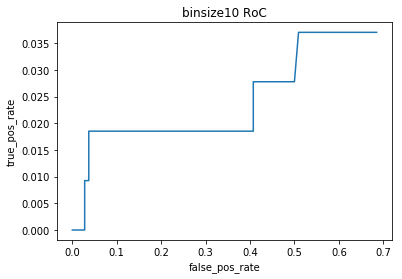

In [804]:
likelihood_leave_10, likelihood_stay_10 = cal_MLE(fixed_bins=10)
plot_RoC(test_set,H, likelihood_leave_10, likelihood_stay_10, title = "binsize10 RoC")

### T17

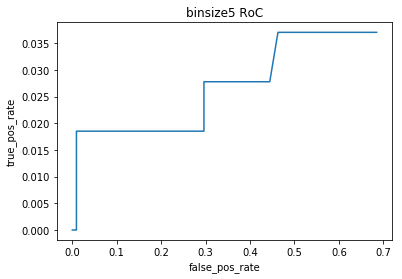

In [805]:
likelihood_leave_5, likelihood_stay_5 = cal_MLE(fixed_bins=5)
plot_RoC(test_set,H, likelihood_leave_5, likelihood_stay_5, title = "binsize5 RoC")